In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf
from scipy import stats

import os
os.system('pip install plotly')

import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('train_data.csv', header=None)

In [3]:
display(df)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,338.539,-98.216,-37488.883,-2346.403,-291.325,553.155,1041.511,391.664,1016.730,49.772,...,350.501,-607.873,430.407,-469.737,68.670,328.636,105.448,-368.834,378.017,-253.044
3746,105.511,-167.468,54447.468,-38055.924,-12394.035,711.218,100.459,-1377.005,-171.175,-325.444,...,4.759,-9.079,104.333,4.676,-1069.879,-92.252,86.110,-4.935,433.674,-355.118
3747,93.186,-155.288,-16555.534,-10605.421,-3027.792,-80.498,-2201.598,-49.392,-848.946,-252.714,...,-342.855,-151.956,7.386,564.910,613.541,-570.735,-5.810,797.659,-289.170,-2025.470
3748,857.066,98.182,-39429.721,26215.357,-1465.352,-340.496,-992.109,990.646,140.943,-281.100,...,200.827,-1445.572,-39.879,421.075,-191.389,-538.616,141.365,552.974,310.130,207.084


# Missing values

In [4]:
nans = df.isnull().sum().sum()
print(nans)

0


# Outliers

In [5]:
df_out = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

MemoryError: Unable to allocate 286. MiB for an array with shape (3750, 10000) and data type float64

# Descriptive statistics

In [5]:
means = []
for i in range(len(df.columns)):
    means.append(df[i].describe()[1])
    
print(means)

KeyboardInterrupt: 

In [36]:
df_means = pd.DataFrame(means)

In [8]:
df_means.plot()

<bound method NDFrame._add_numeric_operations.<locals>.mean of          0        1          2          3          4         5         6     \
0     304.361 -436.590 -33854.769 -96571.569 -15086.947  -794.409  -442.859   
1      54.047   90.087   -154.747  -4116.486  38365.133  -589.309  1115.367   
2     272.168 -201.736   4212.592  -9123.655 -35422.458 -1029.249  -506.290   
3     170.007   68.736  48662.079  29735.235 -13903.955   895.081  -257.748   
4      86.797  180.052 -49643.545   2515.406  26206.315  -407.453  -189.416   
...       ...      ...        ...        ...        ...       ...       ...   
3745  338.539  -98.216 -37488.883  -2346.403   -291.325   553.155  1041.511   
3746  105.511 -167.468  54447.468 -38055.924 -12394.035   711.218   100.459   
3747   93.186 -155.288 -16555.534 -10605.421  -3027.792   -80.498 -2201.598   
3748  857.066   98.182 -39429.721  26215.357  -1465.352  -340.496  -992.109   
3749 -169.394  127.276 -24661.781  37020.744 -17491.827    46.510   

In [54]:
print(df_means.mean())

0    24.076889
dtype: float64


In [48]:
std = []
for i in range(len(df.columns)):
    std.append(df[i].describe()[2])
    
print(std)

[286.1756560577322, 213.07073962576726, 43667.29084725154, 57108.92266328176, 21944.04310059035, 711.5251195982619, 898.1964702140552, 868.7794296943795, 532.7864908693962, 236.62757618141703, 689.092771490269, 588.9726306152113, 870.8925598393067, 662.1377476584935, 906.1296152373828, 204.32613080846494, 944.7264038439251, 852.2055346566285, 348.69229233442695, 798.2847343766988, 370.7794554327864, 239.5063291030858, 796.0817592544179, 208.24130942776182, 200.92576030837458, 353.62457860514047, 183.40341972829617, 234.46392397087303, 785.9508803891147, 461.3650887680812, 728.0983948243747, 965.4282273723916, 247.4529699838825, 264.34037137261834, 479.90978131036377, 324.4080945754196, 378.962741033205, 939.1429660012593, 373.287743321372, 160.19136241933862, 453.8796655241004, 825.6918360621283, 942.9254029087658, 546.9914289065356, 169.3588518805595, 752.2686440113135, 979.2183824623476, 132.39657069564015, 824.6035929212483, 818.6296674259811, 534.639553290919, 168.381331842431, 785

In [49]:
df_std = pd.DataFrame(std)

<AxesSubplot:>

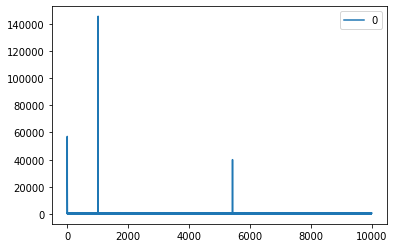

In [50]:
df_std.plot()

In [55]:
print(df_std.mean())

0    580.126048
dtype: float64


In [67]:
var = []
for i in range(len(df.columns)):
    var.append(df[i].var())

print(var)

[81896.50612007345, 45399.140084671504, 1906832289.938458, 3261429047.760697, 481541027.6005669, 506267.99581932084, 806756.8991049883, 754777.6974600913, 283861.4448529252, 55992.609809492315, 474848.84772014007, 346888.75961380213, 758453.8507834605, 438426.3968742628, 821070.8796102474, 41749.167731157926, 892507.9781198751, 726254.27329939, 121586.31473343745, 637258.5171388766, 137477.40457103364, 57363.28168043564, 633746.1674176089, 43364.442952188845, 40371.1611554984, 125050.34259366318, 33636.81436803358, 54973.33164381933, 617718.7863844244, 212857.74513397942, 530127.272545831, 932051.6622073981, 61232.972353844256, 69875.83193741376, 230313.39819736115, 105240.61182605442, 143612.75909140002, 881989.5105896426, 139343.7393139625, 25661.272593763897, 206006.75077626927, 681767.0081396487, 889108.3154506583, 299199.6232972135, 28682.4207103013, 565908.1127626203, 958868.6405521764, 17528.85193196564, 679971.0854586317, 670154.5323899724, 285839.4519431134, 28352.272913030865

In [68]:
df_var = pd.DataFrame(var)

<AxesSubplot:>

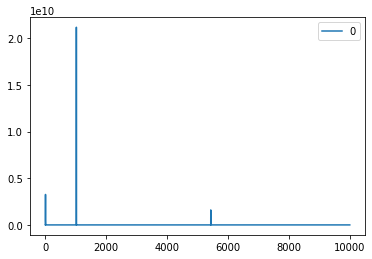

In [69]:
df_var.plot()

In [72]:
print(df_var.mean().round(2))

0    3211429.77
dtype: float64


In [64]:
df.corr()

MemoryError: Unable to allocate 286. MiB for an array with shape (10000, 3749) and data type float64

In [74]:
scatter_plot_df = df.reset_index()
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(6, 6))
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

axs[0, 0].scatter(new_columns, df[0])
fig.tight_layout()
plt.show()

MemoryError: Unable to allocate 286. MiB for an array with shape (10000, 3749) and data type float64

In [7]:
print(df.describe())
print(df.info())

              0            1              2              3             4     \
count  3749.000000  3749.000000    3749.000000    3749.000000   3749.000000   
mean     30.571124     9.199832     178.755026     837.059166   -182.034161   
std     286.175656   213.070740   43667.290847   57108.922663  21944.043101   
min    -989.450000  -859.922000 -163336.428000 -243844.632000 -77566.109000   
25%    -163.862000  -135.333000  -29259.560000  -38027.475000 -14405.498000   
50%      35.463000     2.744000    1208.590000    1037.514000   -147.659000   
75%     215.740000   156.269000   29640.573000   40569.974000  14526.865000   
max    1224.394000   722.868000  177744.241000  215372.854000  86287.955000   

              5            6            7            8            9     ...  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000  ...   
mean     25.936548    25.042892    18.985189    14.883948    15.109637  ...   
std     711.525120   898.196470   868.779430   532.

# PMF

In [5]:
for i in range(len(df.columns)):    
    Pmf.from_seq(df[0], normalize=False)

,probs
-989.450,1
-914.568,1
-873.517,1
-816.182,1
-810.433,1
...,...
920.371,1
943.301,1
951.408,1
1001.767,1


<AxesSubplot:xlabel='0', ylabel='Proportion'>

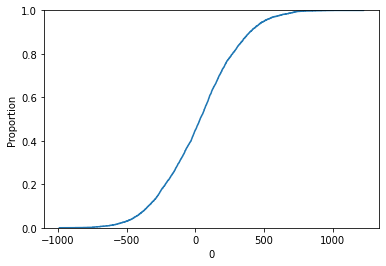

In [6]:
sns.ecdfplot(data=df, x=0)

# Standardizing the data

In [3]:
df = StandardScaler().fit_transform(df[:20])

# Visualization 2d for PCA and TSNE

In [4]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color='Yellow', #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

# PCA

In [5]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)

In [6]:
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [8]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

# t-SNE

In [9]:
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(df)

In [10]:
plot_2d(tsne[:, 0],tsne[:, 1])